## Final Project Submission

Please fill out:
* Student name: Erick Kibugi, Hilda Jerotich, David Muriithi, Alice Muia, Emmanuel Kipleting, Boniface Njeri, Bernice Nyawira  
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: George Kamundia
* Blog post URL:


## Introduction
Golden Arc Pictures is preparing to launch a new movie studio with the goal of producing original video content. However, the company currently lacks experience in film production. This analysis will explore various datasets related to the movie industry to uncover trends, patterns, and audience preferences. The insights gained will be translated into actionable recommendations that the head of Golden Arc Pictures’s new studio can use to make informed decisions about the types of films to develop.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import gzip
import sqlite3
import seaborn as sns


## Data loading, extraction and analysis

For the first dataset, we are dealing with tmdd.movies.csv.gz 

In [2]:
df_tmdb_mov = pd.read_csv('tmdb.movies.csv')
df_tmdb_mov.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
# with the following lines of code, we aim to investigate the dataset and understand its structure, size, and data types.
df_tmdb_mov.info()
df_tmdb_mov.shape
df_tmdb_mov.duplicated().sum()
df_tmdb_mov.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

As a result, we have observed there are no duplicates, no null values and date format is YYYY-MM-DD.

In [4]:
# We will now check the number of movies available in each language.
count_by_language = df_tmdb_mov['original_language'].value_counts()
print(count_by_language)

original_language
en    23291
fr      507
es      455
ru      298
ja      265
      ...  
bo        1
si        1
sl        1
hz        1
dz        1
Name: count, Length: 76, dtype: int64


## Data visualization

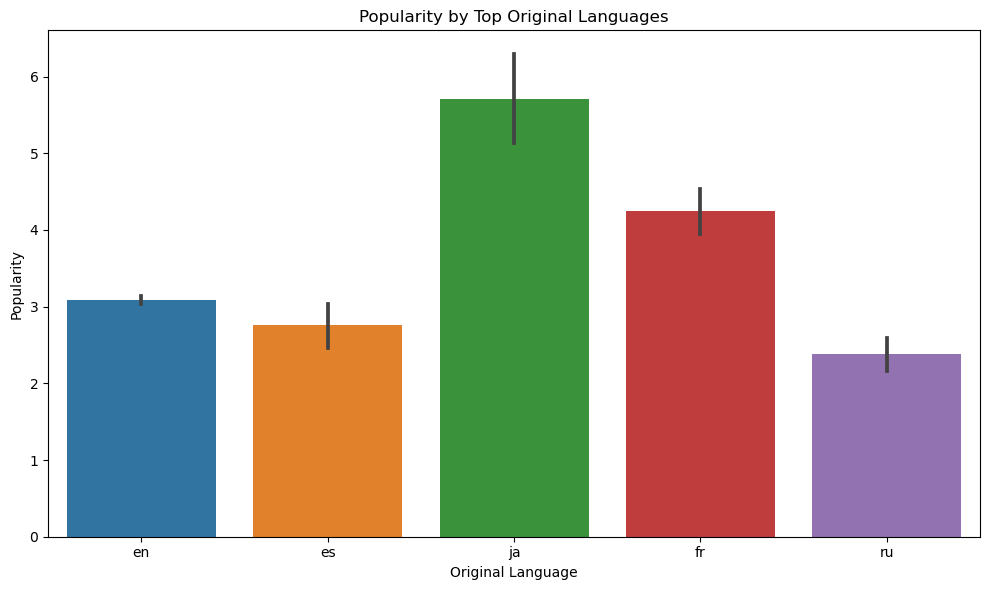

In [5]:
# the following is a simple bar plot to visualize the count of movies by original language
import matplotlib.pyplot as plt
top_languages = df_tmdb_mov['original_language'].value_counts().nlargest(5).index
filtered_df = df_tmdb_mov[df_tmdb_mov['original_language'].isin(top_languages)]

plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df, x='original_language', y='popularity')
plt.title('Popularity by Top Original Languages')
plt.xlabel('Original Language')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

Inference: Japanese is obsereved to have a higher popularity despite having less movie counts compares to a language like English that is the most common.  

### Checking for normality


Language: en


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


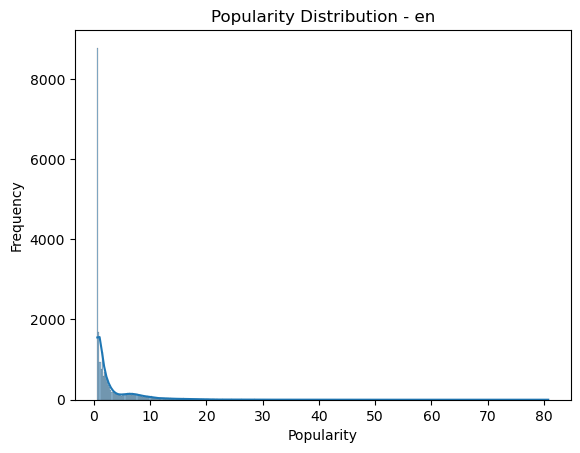


Language: fr


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


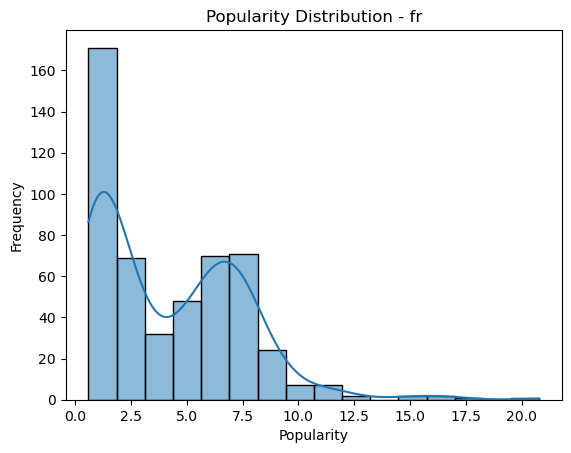


Language: es


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


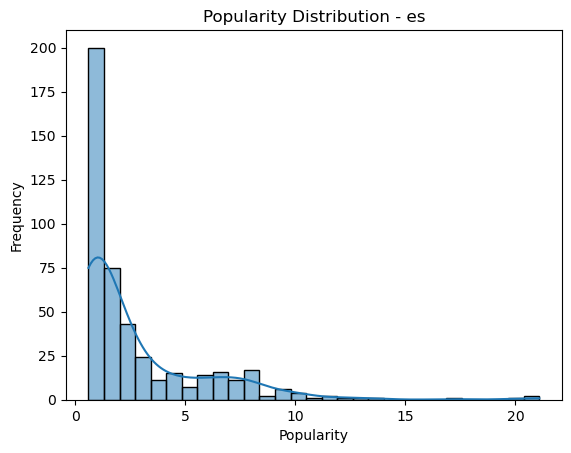


Language: ru


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


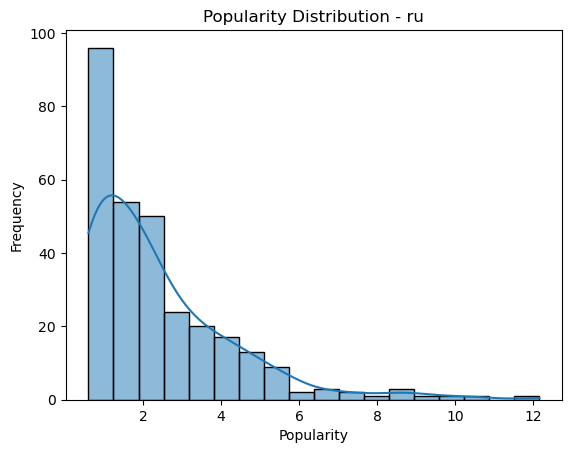


Language: ja


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


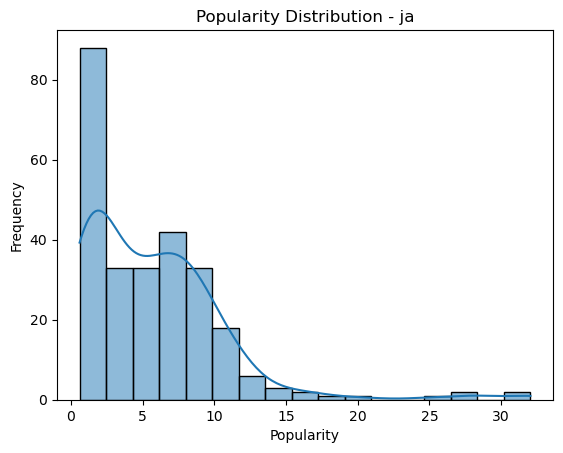

In [6]:
top_languages = df_tmdb_mov['original_language'].value_counts().nlargest(5).index

for lang in top_languages:
    lang_data = df_tmdb_mov[df_tmdb_mov['original_language'] == lang]['popularity']
    
    print(f'\nLanguage: {lang}')

    # Histogram
    sns.histplot(lang_data, kde=True)
    plt.title(f'Popularity Distribution - {lang}')
    plt.xlabel('Popularity')
    plt.ylabel('Frequency')
    plt.show()

###  Hypothesis testing

In [7]:
# Group popularity by language
groups = [filtered_df[filtered_df['original_language'] == lang]['popularity'] for lang in top_languages]

from scipy.stats import f_oneway
# Perform one-way ANOVA
f_stat, p_val = f_oneway(*groups)

print(f"ANOVA test: F-statistic = {f_stat:.3f}, p-value = {p_val:.4f}")

ANOVA test: F-statistic = 34.246, p-value = 0.0000


There is a significant difference in average popularity among languages since p<0.05

## The second dataset

The second dataset under investigation is 'tn.movie_budgets.csv'.

### Data loading, extraction, cleaning and analysis

In [8]:
df_tmdb_mov_bud = pd.read_csv('tn.movie_budgets.csv')
df_tmdb_mov_bud.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,profit,roi,release_year,release_month
0,1,1959-07-18,The Nun's Story,3500000,12800000,12800000,25600000,22100000,6.314286,1959,7
1,1,1962-06-13,Lolita,2000000,9250000,9250000,18500000,16500000,8.250000,1962,6
2,1,1974-02-07,Blazing Saddles,2600000,119500000,119500000,239000000,236400000,90.923077,1974,2
3,1,1978-06-16,Jaws 2,20000000,102922376,208900376,311822752,291822752,14.591138,1978,6
4,1,1980-11-14,Raging Bull,18000000,23380203,23380203,46760406,28760406,1.597800,1980,11


In [9]:
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in cols:
    # Remove non-numeric characters
    df_tmdb_mov_bud[col] = df_tmdb_mov_bud[col].replace('[\$,]', '', regex=True)
    # Convert to numeric, set errors='coerce' to handle bad data
    df_tmdb_mov_bud[col] = pd.to_numeric(df_tmdb_mov_bud[col], errors='coerce')

In [10]:
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in cols:
    df_tmdb_mov_bud[col] = df_tmdb_mov_bud[col].replace('[\$,]', '', regex=True).astype(int)

In [11]:
## Remove rows where 'budget' values are missing or zero
df_tmdb_mov_bud = df_tmdb_mov_bud.dropna(subset=['domestic_gross','worldwide_gross', 'production_budget'])
df_tmdb_mov_bud = df_tmdb_mov_bud[
    (df_tmdb_mov_bud['domestic_gross'] != 0) &
    (df_tmdb_mov_bud['worldwide_gross'] != 0) &
    (df_tmdb_mov_bud['production_budget'] != 0)
]

In [12]:
# create a new column 'revenue' as the sum of 'domestic_gross' and 'worldwide_gross'
df_tmdb_mov_bud['revenue'] = df_tmdb_mov_bud['domestic_gross'] + df_tmdb_mov_bud['worldwide_gross']

In [13]:
# create a new column 'revenue' as the sum of 'domestic_gross' and 'worldwide_gross'
df_tmdb_mov_bud['revenue'] = df_tmdb_mov_bud['domestic_gross'] + df_tmdb_mov_bud['worldwide_gross']

In [14]:
# create ROI = (revenue - production_budget) / production_budget
df_tmdb_mov_bud['roi'] = (df_tmdb_mov_bud['revenue'] - df_tmdb_mov_bud['production_budget']) / df_tmdb_mov_bud['production_budget']

# Convert 'release_date' to datetime
df_tmdb_mov_bud['release_date'] = pd.to_datetime(df_tmdb_mov_bud['release_date'], errors='coerce')

# Extract year and month into new columns
df_tmdb_mov_bud['release_year'] = df_tmdb_mov_bud['release_date'].dt.year
df_tmdb_mov_bud['release_month'] = df_tmdb_mov_bud['release_date'].dt.month

In [15]:
df_tmdb_mov_bud.info()
df_tmdb_mov_bud.shape
df_tmdb_mov_bud.duplicated().sum()
df_tmdb_mov_bud.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5234 entries, 0 to 5233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5234 non-null   int64  
 1   release_date       5234 non-null   object 
 2   movie              5234 non-null   object 
 3   production_budget  5234 non-null   int32  
 4   domestic_gross     5234 non-null   int32  
 5   worldwide_gross    5234 non-null   int32  
 6   revenue            5234 non-null   int32  
 7   profit             5234 non-null   int64  
 8   roi                5234 non-null   float64
 9   release_year       5234 non-null   int64  
 10  release_month      5234 non-null   int64  
dtypes: float64(1), int32(4), int64(4), object(2)
memory usage: 368.1+ KB


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
revenue              0
profit               0
roi                  0
release_year         0
release_month        0
dtype: int64

In [16]:
df_tmdb_mov_bud_sorted = df_tmdb_mov_bud.sort_values(
    by=['id','release_date','production_budget', 'domestic_gross', 'worldwide_gross','release_year','release_month', 'revenue', 'profit', 'roi'],
    ascending=True)
df_tmdb_mov_bud_sorted.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,profit,roi,release_year,release_month
0,1,1959-07-18,The Nun's Story,3500000,12800000,12800000,25600000,22100000,6.314286,1959,7
1,1,1962-06-13,Lolita,2000000,9250000,9250000,18500000,16500000,8.250000,1962,6
2,1,1974-02-07,Blazing Saddles,2600000,119500000,119500000,239000000,236400000,90.923077,1974,2
3,1,1978-06-16,Jaws 2,20000000,102922376,208900376,311822752,291822752,14.591138,1978,6
4,1,1980-11-14,Raging Bull,18000000,23380203,23380203,46760406,28760406,1.597800,1980,11


In [17]:
df_tmdb_mov_bud['production_budget'].max()

425000000

In [18]:
#Saving df_tmdb_mov_bud_sorted as a csv file
df_tmdb_mov_bud_sorted.to_csv('tn.movie_budgets.csv', index= False)

### Data visualization

In [19]:
# Create labeled budget range column
bin_edges = [0, 10_000_000, 50_000_000, 100_000_000, 200_000_000, 300_000_000, 425_000_000]
bin_labels = ['0–10M', '10M–50M', '50M–100M', '100M–200M', '200M–300M', '300M–425M']
df_tmdb_mov_bud['budget_range'] = pd.cut(df_tmdb_mov_bud['production_budget'], bins=bin_edges, labels=bin_labels, include_lowest=True)

c:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


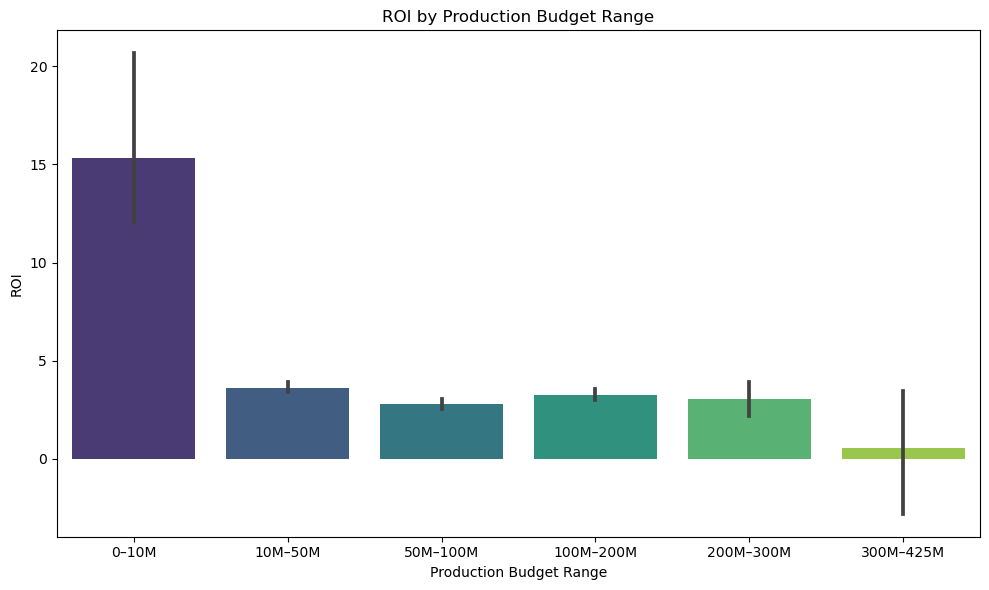

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_tmdb_mov_bud, x='budget_range', y='roi', palette='viridis')

plt.title('ROI by Production Budget Range')
plt.xlabel('Production Budget Range')
plt.ylabel('ROI')
plt.xticks(rotation=0, fontsize=10)  # Keep horizontal and readable
plt.tight_layout()
plt.show()

The lower budgeted movies have the highest return on interest compared to the highest budgeted movies which have lowest return on interest.

### Hypothesis testing

In [22]:
# Group ROI by range
groups = [group['roi'] for _, group in df_tmdb_mov_bud.groupby('budget_range')]

# ANOVA
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA: F = {f_stat:.3f}, p = {p_val:.4f}")

ANOVA: F = 10.263, p = 0.0000


C:\Users\user\AppData\Local\Temp\ipykernel_83936\85195128.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['roi'] for _, group in df_tmdb_mov_bud.groupby('budget_range')]


There is a statistical significance in ROI across budget ranges since p<0.05